# EDA (downloaded document corpus) for 'debiaser' data product
#### Sagar Setru, September 21th, 2020

## Brief description using CoNVO framework

### Context

Some people are eager to get news from outside of their echo chamber. However, they do not know where to go outside of their echo chambers, and may also have some activation energy when it comes to seeking information from other sources. In the meantime, most newsfeeds only push you content that you agree with. You end up in an echo chamber, but may not have ever wanted to be in one in the first place.

### Need

A way to find news articles from different yet reliable media sources.

### Vision

Debiaser, a data product (maybe Chrome plug-in?) that will recommend news articles similar in topic to the one currently being read, but from several pre-curated and reliable news media organizations across the political spectrum, for example, following the "media bias chart" here https://www.adfontesmedia.com/ or the "media bias ratings" here: https://www.allsides.com/media-bias/media-bias-ratings. The app will determine the main topics of the text of a news article, and then show links to similar articles from other news organizations.

The product will generate topics for a given document via latent Dirichlet allocation (LDA) and then search news websites for the topic words generated.

Caveats: Many of these articles may be behind paywalls. News aggregators already basically do this. How different is this than just searching Google using the title of an article?

### Outcome

People who are motivated to engage in content outside of their echo chambers have a tool that enables them to quickly find news similar to what they are currently reading, but from a variety of news organizations.

### EDA of news articles database
News articles taken from here: https://components.one/datasets/all-the-news-articles-dataset/

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
# make sure I'm in the right environment (should be 'insight')
print('Conda environment:')
print(os.environ['CONDA_DEFAULT_ENV'])

Conda environment:
insight


In [5]:
# get the entire news csv into data frame

# get file name
fname = './all_the_news/all_the_news_db.csv'

# load into data frame
all_news_df = pd.read_csv(fname)

/Users/sagarsetru/anaconda3/envs/insight/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,1,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
all_news_df.head()

,index,id,title,author,date,content,year,month,publication,category,digital,section,url
0,0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
1,1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
2,2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
3,3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN
4,4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN


In [7]:
# show columns
print(all_news_df.columns)

Index(['index', 'id', 'title', 'author', 'date', 'content', 'year', 'month',
       'publication', 'category', 'digital', 'section', 'url'],
      dtype='object')


In [8]:
# show descriptions
all_news_df.describe()

,year,month,digital
count,191530.000000,191530.000000,193115.000000
mean,2016.312374,5.723589,1.060435
std,0.833314,3.467818,1.200331
min,2000.000000,1.000000,0.000000
25%,2016.000000,3.000000,0.000000
50%,2016.000000,5.000000,1.000000
75%,2017.000000,9.000000,1.000000
max,2018.000000,12.000000,4.000000


In [9]:
# determine number of nan
all_news_df.isnull().sum()

index               0
id                  0
title               5
author          54071
date            34274
content         37072
year            34274
month           34274
publication     29384
category        57091
digital         32689
section        151232
url            127008
dtype: int64

In [10]:
# remove articles that are nan
all_news_df = all_news_df[pd.notnull(all_news_df['content'])]

In [11]:
all_news_df.isnull().sum()

index               0
id                  0
title               3
author          19967
date             4422
content             0
year             4422
month            4422
publication         4
category        26607
digital          3268
section        117336
url             97449
dtype: int64

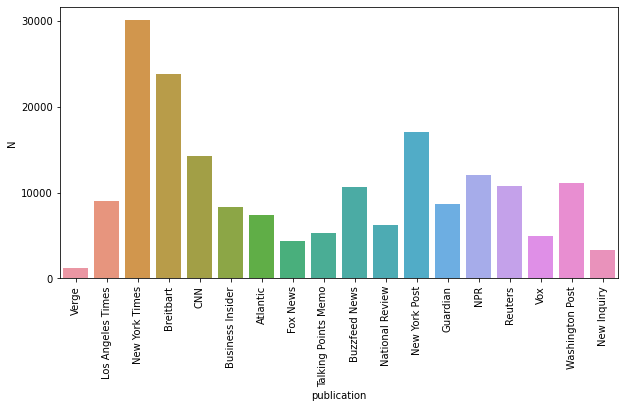

<Figure size 432x288 with 0 Axes>

In [12]:
# plot histograms of data across publications

plt.figure(figsize=(10,5));
sns.countplot(all_news_df['publication'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

We see a decent distribution of data across news media organizations and also across the political spectrum.

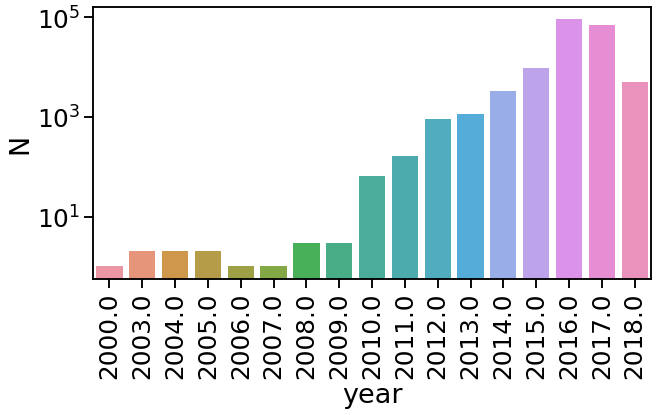

<Figure size 432x288 with 0 Axes>

In [13]:
# plot histograms across year published

plt.figure(figsize=(10,5));
sns.countplot(all_news_df['year'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.yscale('log')
plt.show();
plt.clf()

Articles are mostly from 2015 to 2018. There are some older articles. This may make topic modeling of older news difficult.

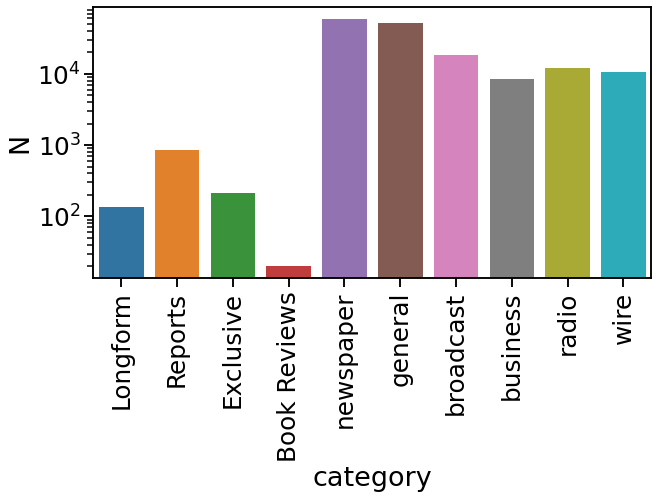

<Figure size 432x288 with 0 Axes>

In [14]:
# plot histograms across type/category of article

plt.figure(figsize=(10,5));
sns.countplot(all_news_df['category'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.yscale('log')
plt.show();
plt.clf()

There are pletny of news paper articles. The radio component is interesting. What is that?

In [15]:
radio_news = all_news_df.loc[all_news_df['category'] == 'radio']

radio_news.head()


,index,id,title,author,date,content,year,month,publication,category,digital,section,url
126586,126586,160641,"Thanks To Russia, 2016 Isn't Really Going To E...",Ron Elving,2016-12-31,"[In the Washington of 2016, even when the poli...",2016.0,12.0,NPR,radio,3.0,NaN,http://www.npr.org/2016/12/31/507596704/for-tr...
126587,126587,160642,Trump Tweets Give A Glimpse Into Foreign Polic...,Jessica Taylor,2016-12-28,[President-elect Donald Trump has used Twitter...,2016.0,12.0,NPR,radio,3.0,NaN,http://www.npr.org/2016/12/28/507284226/trump-...
126588,126588,160643,"As U.S. Confronts Russia, Trump's Admiration O...",Arnie Seipel,2016-12-30,[President-elect Donald Trump is unabashedly p...,2016.0,12.0,NPR,radio,3.0,NaN,http://www.npr.org/2016/12/30/507584595/as-u-s...
126589,126589,160644,Putin Says Russia Won't Expel Diplomats In Res...,Camila Domonoske,2016-12-30,"[Updated at 2:50 p.m. ET, Russian President Vl...",2016.0,12.0,NPR,radio,3.0,thetwo-way,http://www.npr.org/sections/thetwo-way/2016/12...
126590,126590,160645,(Some Of) Our Favorite Visual Stories of 2016,Ariel Zambelich,2016-12-31,"[From photography, illustration and video, to ...",2016.0,12.0,NPR,radio,3.0,NaN,http://www.npr.org/2016/12/31/507590770/-some-...


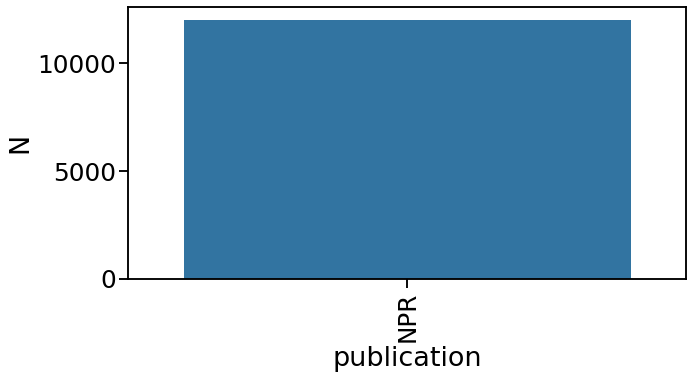

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(10,5));
sns.countplot(radio_news['publication'])
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.show();
plt.clf();

The radio news is entirely "NPR". Interesting. Let's look at an article to get a sense of whether it is transcribed from an interview or an NPR news article.

In [17]:
radio_news.iloc[1,5]

'[President-elect Donald Trump has used Twitter — his preferred means of communication — to weigh in on a swath of foreign policy issues over the past few weeks., His comments give a glimpse into how his incoming administration will deal with pressing foreign matters — but also highlight how reactionary comments on social media can immediately spur international concern and attention. And his staff has indicated that taking to Twitter to air his concerns or, often, grievances, won\'t end once he enters the Oval Office., On Wednesday, Trump blasted the U.S.\'s abstention from the U.N. Security Council vote on Israeli settlements earlier this month., , The tweets came just hours before Secretary of State John Kerry gave a speech defending the decision and calling the continued building of settlements on Palestinian territory in the West Bank a threat to the two-state solution in the region., Trump\'s support for Israel and Prime Minister Benjamin Netanyahu — who has had a fraught relatio

Is this transcribed from a radio recording or a news article from NPR? A quick Google search verifies it is a news article. I think it is certainly okay to include this.

In [18]:
# let's look at the lengths of the articles in words. first compute their lengths
all_news_df['article_length'] = all_news_df.apply(lambda x: len(x['content'].split(' ')),axis=1)
all_news_df.head()

,index,id,title,author,date,content,year,month,publication,category,digital,section,url,article_length
0,0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,2121
1,1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,1948
2,2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,3011
3,3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,3281
4,4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,239


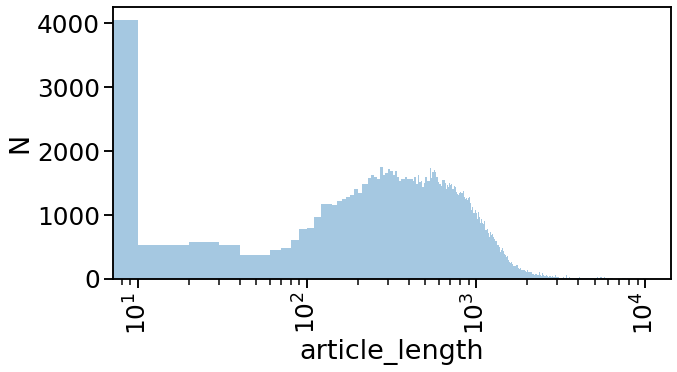

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,5));
sns.distplot(all_news_df['article_length'],kde=False,bins=np.arange(0,10000,10))
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.xscale('log')
plt.show();
plt.clf()

There are many short articles. I think it is fair to remove the shortest ones. We will choose a cut off of 50 words to
keep some shorter articles.

In [20]:
all_news_df = all_news_df.loc[all_news_df['article_length'] > 50]

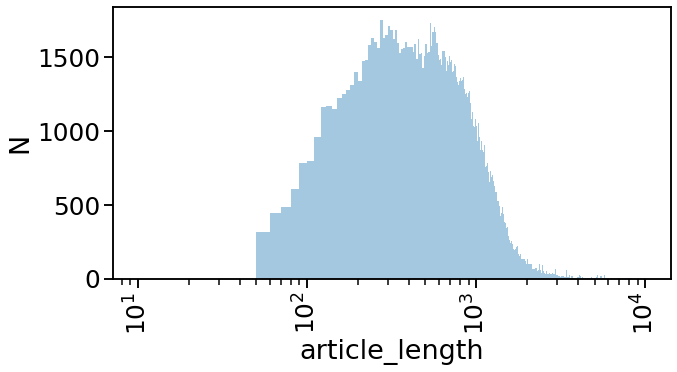

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(10,5));
sns.distplot(all_news_df['article_length'],kde=False,bins=np.arange(0,10000,10))
plt.ylabel('N');
sns.set_context('talk', font_scale=1.5);
plt.xticks(rotation=90);
plt.xscale('log')
plt.show();
plt.clf()

This looks like a reasonable distribution of articles to work with as the corpus.

In [22]:
all_news_df['content'].shape

(182636,)

There are ~180,000 articles in this final article corpus. Save it to a csv.

In [72]:
all_news_df.to_csv('./all_the_news/all_news_df_processed.csv', index_label='index')

### testing single document lda on these articles

In [23]:
all_news_df.head()

,index,id,title,author,date,content,year,month,publication,category,digital,section,url,article_length
0,0,1,Agent Cooper in Twin Peaks is the audience: on...,\nTasha Robinson\n,2017-05-31,And never more so than in Showtime’s new...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,2121
1,1,2,"AI, the humanity!",\nSam Byford\n,2017-05-30,AlphaGo’s victory isn’t a defeat for hum...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,1948
2,2,3,The Viral Machine,\nKaitlyn Tiffany\n,2017-05-25,Super Deluxe built a weird internet empi...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,3011
3,3,4,How Anker is beating Apple and Samsung at thei...,\nNick Statt\n,2017-05-22,Steven Yang quit his job at Google in th...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,3281
4,4,5,Tour Black Panther’s reimagined homeland with ...,\nKwame Opam\n,2017-05-15,Ahead of Black Panther’s 2018 theatrical...,2017.0,5.0,Verge,Longform,1.0,NaN,NaN,239


In [ ]:
# get a random sampling of these articles for testing single document lda

n_sample = 1000

articles_df_test = articles_df.sample(n=n_sample)

In [1]:
# NLP Packages
import spacy
nlp  = spacy.load('en_core_web_sm')

from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

# to break articles up into sentences
from nltk import tokenize

# for counting frequency of words
from collections import defaultdict

import spacy
nlp  = spacy.load('en_core_web_sm')

In [5]:
def load_stop_words_csv_to_list(full_file_name):
    """fxn that loads stop words list downloaded from git repo called 'news-stopwords'"""
    
    stop_words = pd.read_csv(full_file_name)

    stop_words = stop_words['term']

    stop_words = [word for word in stop_words]
    
    return stop_words

In [6]:
def get_simple_corpus_dictionary_bow(texts,word_frequency_threshold):
    """fxn returns corpus, proc. dict, bag of words"""
    
    # Count word frequencies
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1

    # Only keep words that appear more than set frequency, to produce the corpus
    processed_corpus = [[token for token in text if frequency[token] > word_frequency_threshold] for text in texts]
    
    # generate a dictionary via gensim
    processed_dictionary = Dictionary(processed_corpus)
    
    # generate bag of words of the corpus
    bow_corpus = [processed_dictionary.doc2bow(text) for text in processed_corpus]
    
    return processed_corpus, processed_dictionary, bow_corpus

In [7]:
def sort_topics_mean_frequency(topics,topics_mean_probs_dict,topics_std_probs_dict,topics_frequency_dict):
    """fxn returns topics sorted by their mean probability and frequency. also returns std dev of prob"""
    
    # empty dict for topics
    x_topics = []
    
    # to store mean probs
    y_means = np.zeros((len(topics_mean_probs_dict)))
    
    # to store std dev probs
    y_std = np.zeros((len(topics_std_probs_dict)))
    
    # to store frequency of topic
    y_frequencies = np.zeros((len(topics_frequency_dict)))

    # measure mean probs
    counter = -1
    for topics, mean_prob in topics_mean_probs_dict.items():
        counter += 1
        x_topics.append(topics)
        y_means[counter] = mean_prob

    # measure std dev probs
    counter2 = -1
    for topics, frequency in topics_frequency_dict.items():
        counter2 += 1
        y_frequencies[counter2] = frequency

    # measure frequency topic shows up
    counter3 = -1
    for topics, std in topics_std_probs_dict.items():
        counter3 += 1
        y_std[counter3] = std

    # sort by mean and frequency

    zipped_mean = zip(y_means, x_topics)
    sorted_zipped_mean = sorted(zipped_mean)
    y_means_sorted = [element1 for element1,element2 in sorted_zipped_mean]
    y_means_sorted = y_means_sorted[::-1]
    x_topics_means = [element2 for element1,element2 in sorted_zipped_mean]
    x_topics_means = x_topics_means[::-1]

    zipped_mean_std = zip(y_means,y_std)
    sorted_zipped_mean_std = sorted(zipped_mean_std)
    y_std_sorted = [element2 for element1,element2 in sorted_zipped_mean_std]
    y_std_sorted = y_std_sorted[::-1]

    zipped_freq = zip(y_frequencies,x_topics)
    sorted_zipped_freq = sorted(zipped_freq)
    y_freq_sorted = [element1 for (element1,element2) in sorted_zipped_freq]
    y_freq_sorted = y_freq_sorted[::-1]
    x_topics_freq = [element2 for element1,element2 in sorted_zipped_freq]
    x_topics_freq = x_topics_freq[::-1]
    
    return x_topics_means, y_means_sorted, y_std_sorted, x_topics_freq, y_freq_sorted

In [9]:
# choose list of stop words

# choose whether 1k, 10k, 100k, or nltk
which_stop_words = '1k'
# which_stop_words = '10k'
# which_stop_words = '100k'
# which_stop_words = 'nltk'

stop_words_path = '/Users/sagarsetru/Documents/post PhD positions search/insightDataScience/project/debiaser/stop_words_db/news-stopwords-master/'


if which_stop_words == '1k':
    
    # doing 1k words list
    stop_words_file_name = 'sw1k.csv'
    
    # make full file name
    stop_words_full_file_name = stop_words_path+stop_words_file_name
    
    # get list of stop words
    stop_words = load_stop_words_csv_to_list(stop_words_full_file_name)
    
elif which_stop_words == '10k':
    
    # doing 10k words list
    stop_words_file_name = 'sw10k.csv'

    # make full file name
    stop_words_full_file_name = stop_words_path+stop_words_file_name
    
    # get list of stop words
    stop_words = load_stop_words_csv_to_list(stop_words_full_file_name)

elif which_stop_words == '100k':
    
    # doing 100k
    stop_words_file_name = 'sw100k.csv'  
    
    # get full file name
    stop_words_full_file_name = stop_words_path+stop_words_file_name
    
    # get list of stop words
    stop_words = load_stop_words_csv_to_list(stop_words_full_file_name)


elif which_stop_words == 'nltk':
    # import from nltk
    from nltk.corpus import stopwords
    
    stop_words = stopwords.words('english')
    
else:
    print('Select proper variable name for "which_stop_words"')
    
# adding custom words
stop_words.append('said')
stop_words.append('youre')

ap_hurricane_sally_unleashes_20200916.txt
.txt


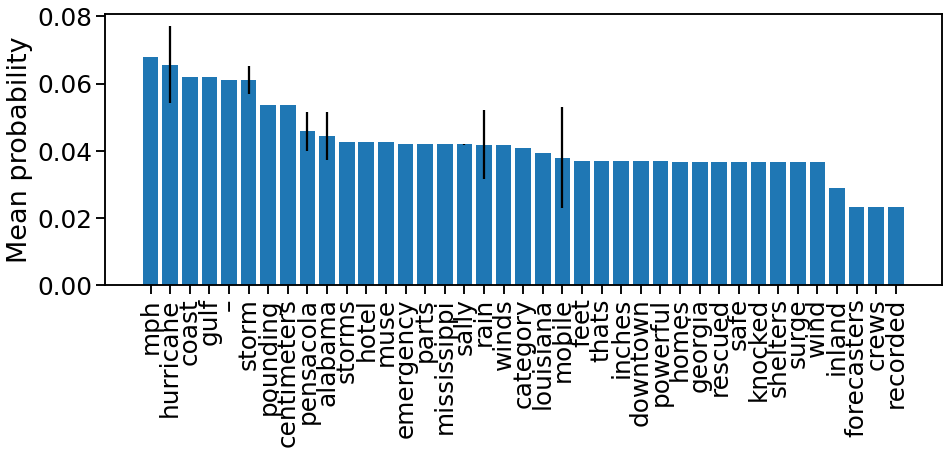

<Figure size 432x288 with 0 Axes>

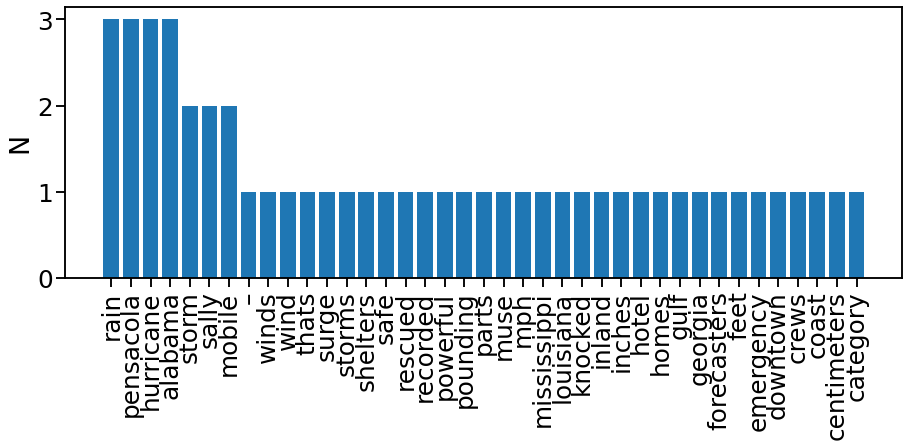

cnn_big_ten_backtracks_20200916.txt
.txt


<Figure size 432x288 with 0 Axes>

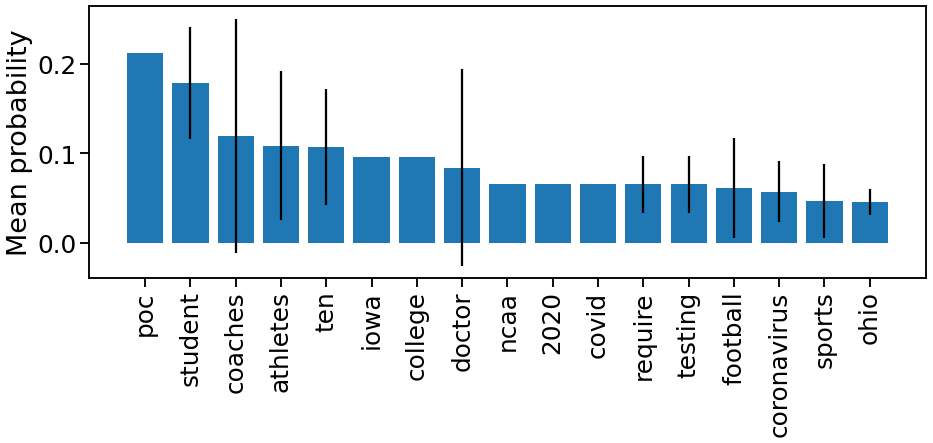

<Figure size 432x288 with 0 Axes>

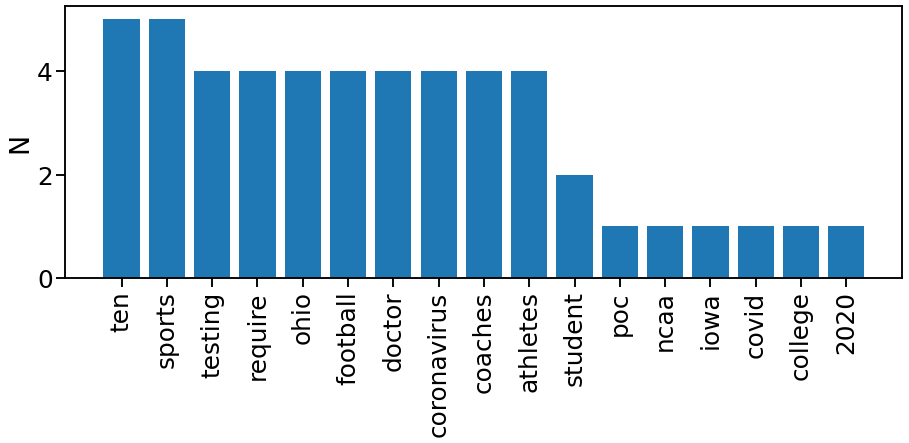

nyt_on_the_fire_line_20200915.txt
.txt


<Figure size 432x288 with 0 Axes>

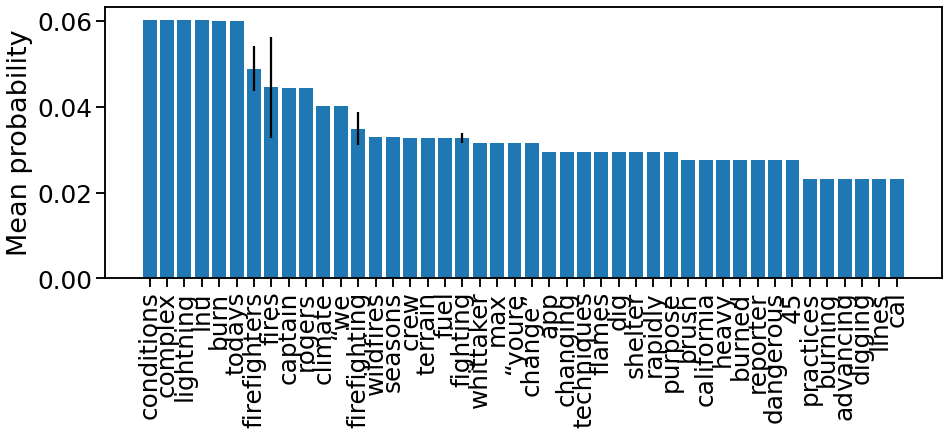

<Figure size 432x288 with 0 Axes>

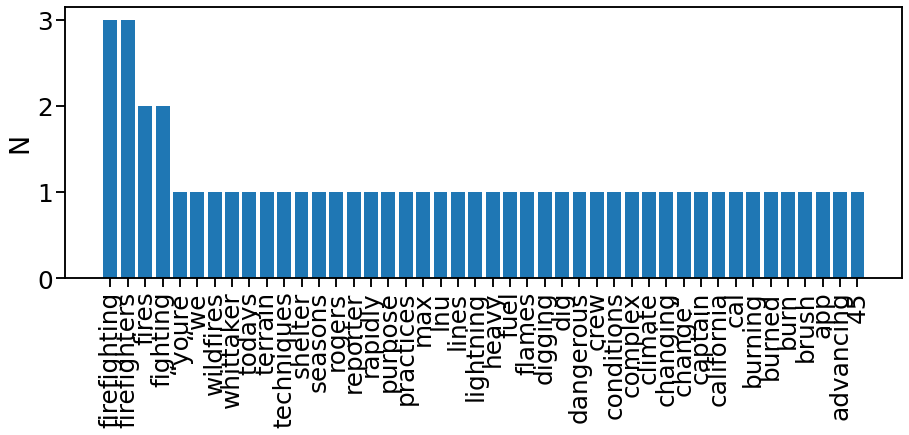

foxnews_snake_face_mask_20200916_v2.txt
.txt


<Figure size 432x288 with 0 Axes>

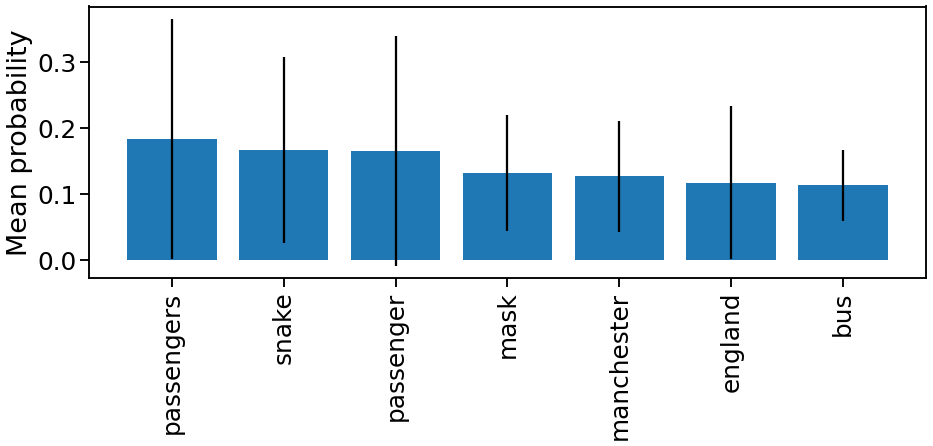

<Figure size 432x288 with 0 Axes>

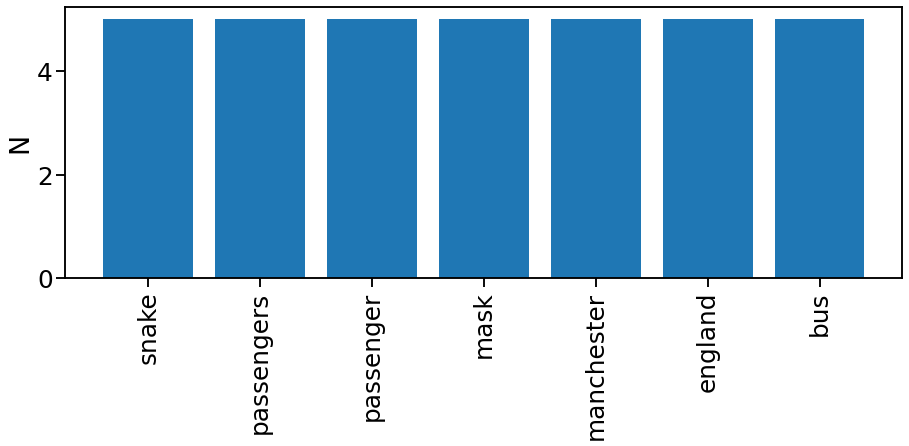

U.S. Stocks Lower as Fed Outlook Rattles Investors - WSJ.html
.html
The Wall Street Journal
 


<Figure size 432x288 with 0 Axes>

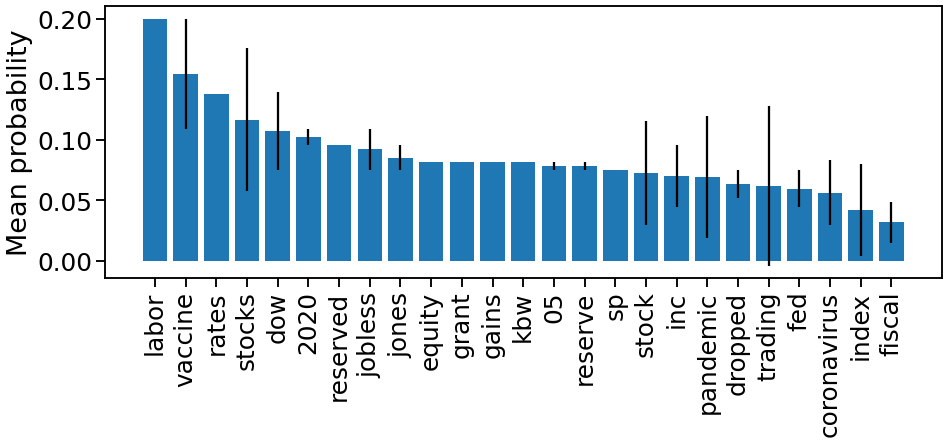

<Figure size 432x288 with 0 Axes>

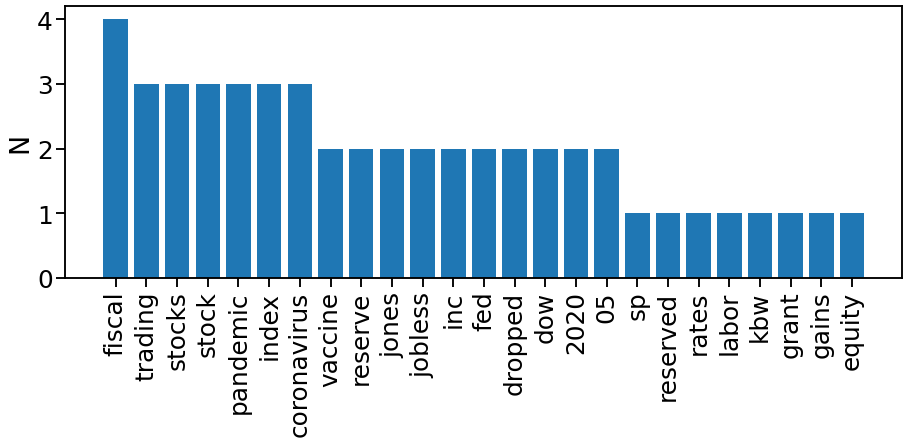

<Figure size 432x288 with 0 Axes>

In [62]:
# Create a floor of the frequency of words to remove
word_frequency_threshold = 1

# choose the number of LDA topics
num_lda_topics = 5

# do by sentences
do_sentences = 1

n_passes = 20

# loop through files
for ind, full_file_name in enumerate(full_file_names):
    

        
    # replace weird apostrophes
    article_text = article_text.replace("`","'")
    article_text = article_text.replace("’","'")
    article_text = article_text.replace("'","'")
    
    # replace long dashes with short dashes
    article_text = article_text.replace("—","-")
    
    # replace short dashes with spaces
    article_text = article_text.replace("-"," ")
    
    if do_sentences:
        # break article into sentences
        article_text = tokenize.sent_tokenize(article_text)

        article_text = [sentence.translate(sentence.maketrans('', '', string.punctuation)) for sentence in article_text]

        # following https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html#sphx-glr-auto-examples-core-run-core-concepts-py
        # Lowercase each document, split it by white space and filter out stopwords
        texts = [[word for word in document.lower().split() if word not in stop_words] 
                 for document in article_text]
        
    else:
        # get rid of punctuation
        article_text = article_text.translate(article_text.maketrans('', '', string.punctuation))

        # following https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html#sphx-glr-auto-examples-core-run-core-concepts-py
        # Lowercase each document, split it by white space and filter out stopwords
        texts = [[word for word in document.lower().split() if word not in stop_words] for document in [article_text]]
            
    # get corpus, dictionary, bag of words
    processed_corpus, processed_dictionary, bow_corpus = get_simple_corpus_dictionary_bow(texts,
                                                                                          word_frequency_threshold)
    
    # generate the LDA model
    lda = gensim.models.LdaModel(corpus = bow_corpus,
                                 num_topics = 5,
                                 id2word = processed_dictionary,
                                 passes = n_passes)

    # get the topics from the lda model
    lda_topics = lda.show_topics(formatted=False)
    
    # dictionary for topics and the probabilities associated with them
    topics_probs_dict = {}
    
    # list of unique topic names
    topics = []
    
    # loop through each list of generated topics
    for topic in lda_topics:
        
        # get the list of topics
        topic_words = topic[1]
        
        # loop through topic words and probabilities
        for topic_word, prob in topic_words:
            
            # if the word isn't already in the list of topics, add it to list of topics
            if topic_word not in topics: 
                topics.append(topic_word)
                
            # if the word is not a key in the dictionary of topics to probabilities, add it to dictionary
            if topic_word not in topics_probs_dict.keys():
                
                topics_probs_dict[topic_word] = np.array([prob])
            
            # if the word is a key in the dictionary of topics to probabilities, append probability
            else:
                topics_probs_dict[topic_word] = np.append(topics_probs_dict[topic_word],[prob])
        
    # dictionary for topic probability means
    topics_mean_probs_dict = {}

    # dictionary for topic probability std devs
    topics_std_probs_dict = {}

    # dictionary for topic frequency
    topics_frequency_dict = {}

    # loop through topics and probabilities
    for topic, prob in topics_probs_dict.items():

        # update dictionary for mean probability
        topics_mean_probs_dict[topic] = np.mean(prob)

        # update dictionary for std dev probability
        topics_std_probs_dict[topic] = np.std(prob)

        # update dictionary for topic frequency
        topics_frequency_dict[topic] =  prob.size

            
            
    # get the topic mean probs and frequencies, sorted
    topics_means, means_sorted, std_sorted, topics_freq, freq_sorted = sort_topics_mean_frequency(topics,
                                             topics_mean_probs_dict,
                                             topics_std_probs_dict,
                                             topics_frequency_dict)
        
    plt.figure(figsize=(15,5));
    plt.bar(topics_means,means_sorted,yerr=std_sorted);
    plt.ylabel('Mean probability');
    sns.set_context('talk', font_scale=1.5);
    plt.xticks(rotation=90);
    plt.show();
    plt.clf();
#     plt.savefig('./eda_figs/mean_prob_vs_topic_big_ten_resumes.png', dpi=300, bbox_inches='tight')
    
    plt.figure(figsize=(15,5));
    plt.bar(topics_freq,freq_sorted);
    plt.ylabel('N');
    # plt.xlabel('Topics')
    sns.set_context('talk', font_scale=1.5);
    plt.xticks(rotation=90);
    plt.show();
    plt.clf();
    # plt.savefig('./edafigs/frequency_vs_topic_big_ten_resumes.pdf')
    
#     print(topics)
#     print(topics_probs_dict)
#     print(' ')
        
#     if ind == 1:
#         break